# Importing libraries 

In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#ensure charts created don't need to be called 
%matplotlib inline

# Importing Data

In [4]:
#creating a path variable for orginal data
path = r'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis'

In [5]:
#checking path variable output 
path

'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis'

In [6]:
#using path variable to import denver_airbnb.csv
df_airbnb = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_new_columns.csv'), index_col = False)

# Data Cleaning

In [7]:
df_airbnb.head()

,Unnamed: 0,id,host_id,host_since,host_is_superhost,location,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,entire_home_apt,Rating category,average_ratings
0,0,607435380788232654,430149575,2021-11-02,False,North Park Hill,39.760390,-104.92968,Private room in home,Private room,...,2.50,3.00,3.50,4.00,3.00,False,0.11,False,Low rating,3.083333
1,1,545714833502855511,169214047,2018-01-22,False,Hale,39.727850,-104.93783,Entire rental unit,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,False,0.00,True,No ratings,0.000000
2,2,52429527,107279139,2016-12-14,True,Five Points,39.758520,-104.98846,Entire townhouse,Entire home/apt,...,4.62,4.78,4.78,4.93,4.59,False,2.52,True,High rating,4.795000
3,3,632494576047532593,416194740,2021-07-31,True,West Colfax,39.736019,-105.05072,Entire townhouse,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,True,0.00,True,No ratings,0.000000
4,4,687768125161080215,133612752,2017-06-05,False,Sunnyside,39.771430,-105.02028,Entire home,Entire home/apt,...,5.00,5.00,5.00,4.92,4.92,False,0.99,True,High rating,4.986667


In [8]:
#deleting the new index column I don't need 
df_airbnb.drop(columns = ['Unnamed: 0'], inplace = True)

In [9]:
df_airbnb.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost', 'location',
       'latitude', 'longitude', 'property_type', 'room_type', 'guest_count',
       'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'entire_home_apt', 'Rating category', 'average_ratings'],
      dtype='object')

In [10]:
df_airbnb.shape

(4816, 36)

In [11]:
#checking for missing values 
df_airbnb.isnull().sum()

id                               0
host_id                          0
host_since                       0
host_is_superhost                0
location                         0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
guest_count                      0
bathrooms                        0
beds                             0
price                           38
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
first_review                   709
last_review                    709
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_commun

In [13]:
#dropping the 38 missing values in price 
df_airbnb.dropna(subset = ['price'], inplace = True)

# leaving the null values for first and last review right now. I may not end up using the columns but as discussed I may turn them into a boolean column later on

In [14]:
#checking for missing values 
df_airbnb.isnull().sum()

id                               0
host_id                          0
host_since                       0
host_is_superhost                0
location                         0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
guest_count                      0
bathrooms                        0
beds                             0
price                            0
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
first_review                   699
last_review                    699
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_commun

In [15]:
#duplicates check 
dups = df_airbnb.duplicated()

In [16]:
dups.shape

(4778,)

# No duplicates found 

# Correlations 

In [24]:
# now that I have aggregated the review scores into one column I want to look at the correlation again 

In [25]:
#creating a subset with only the columns I want to conduct my visual analysis on

columns_to_keep = ['host_is_superhost','latitude', 'longitude', 'entire_home_apt', 'guest_count', 'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d','instant_bookable', 'reviews_per_month', 'average_ratings']
df_bnb_selected = df_airbnb[columns_to_keep]

In [26]:
df_bnb_selected.corr()

,host_is_superhost,latitude,longitude,entire_home_apt,guest_count,bathrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,reviews_per_month,average_ratings
host_is_superhost,1.000000,0.008330,-0.048552,0.087118,0.028350,-0.008420,0.018557,0.019236,-0.207950,-0.058122,-0.130525,-0.118338,-0.118274,-0.189231,0.250526,0.362675,0.168687,-0.012408,0.303895,0.295947
latitude,0.008330,1.000000,0.116037,0.003862,0.017581,0.022874,0.004044,0.037814,-0.096829,-0.008432,0.020190,0.019904,0.015035,-0.008802,0.060570,0.065347,0.053085,0.016146,0.087256,0.058929
longitude,-0.048552,0.116037,1.000000,-0.202448,0.008471,0.033441,0.031089,-0.072000,0.052465,0.016016,0.058137,0.062335,0.061465,0.042233,-0.008588,-0.010374,-0.005707,-0.004569,-0.015490,-0.020116
entire_home_apt,0.087118,0.003862,-0.202448,1.000000,0.302958,0.138234,0.214417,0.238982,0.012977,0.061401,-0.180766,-0.169874,-0.160644,-0.099873,-0.022394,0.038914,0.042321,0.003229,0.045862,0.044892
guest_count,0.028350,0.017581,0.008471,0.302958,1.000000,0.634111,0.880749,0.629962,-0.167332,0.010392,0.022272,0.024696,0.016862,0.007381,-0.018734,0.039386,0.055305,0.056828,0.044949,0.060759
bathrooms,-0.008420,0.022874,0.033441,0.138234,0.634111,1.000000,0.596365,0.626796,-0.065694,-0.002917,0.021063,0.014337,0.004505,0.000505,-0.113589,-0.087468,-0.038783,0.007956,-0.100011,-0.031319
beds,0.018557,0.004044,0.031089,0.214417,0.880749,0.596365,1.000000,0.581606,-0.147996,0.008610,0.022890,0.021672,0.015632,0.011403,-0.005146,0.028550,0.040055,0.022645,0.026913,0.055996
price,0.019236,0.037814,-0.072000,0.238982,0.629962,0.626796,0.581606,1.000000,-0.174157,0.004123,0.052453,0.034231,0.017544,0.004423,-0.064499,-0.020075,-0.027520,0.018540,-0.017375,0.032513
minimum_nights,-0.207950,-0.096829,0.052465,0.012977,-0.167332,-0.065694,-0.147996,-0.174157,1.000000,0.134266,0.008645,0.016515,0.036249,0.199790,-0.241111,-0.414637,-0.299991,-0.069469,-0.426670,-0.259247
maximum_nights,-0.058122,-0.008432,0.016016,0.061401,0.010392,-0.002917,0.008610,0.004123,0.134266,1.000000,-0.027813,-0.029060,-0.019165,0.086727,0.015042,-0.057973,-0.041693,0.037600,-0.066371,0.065239


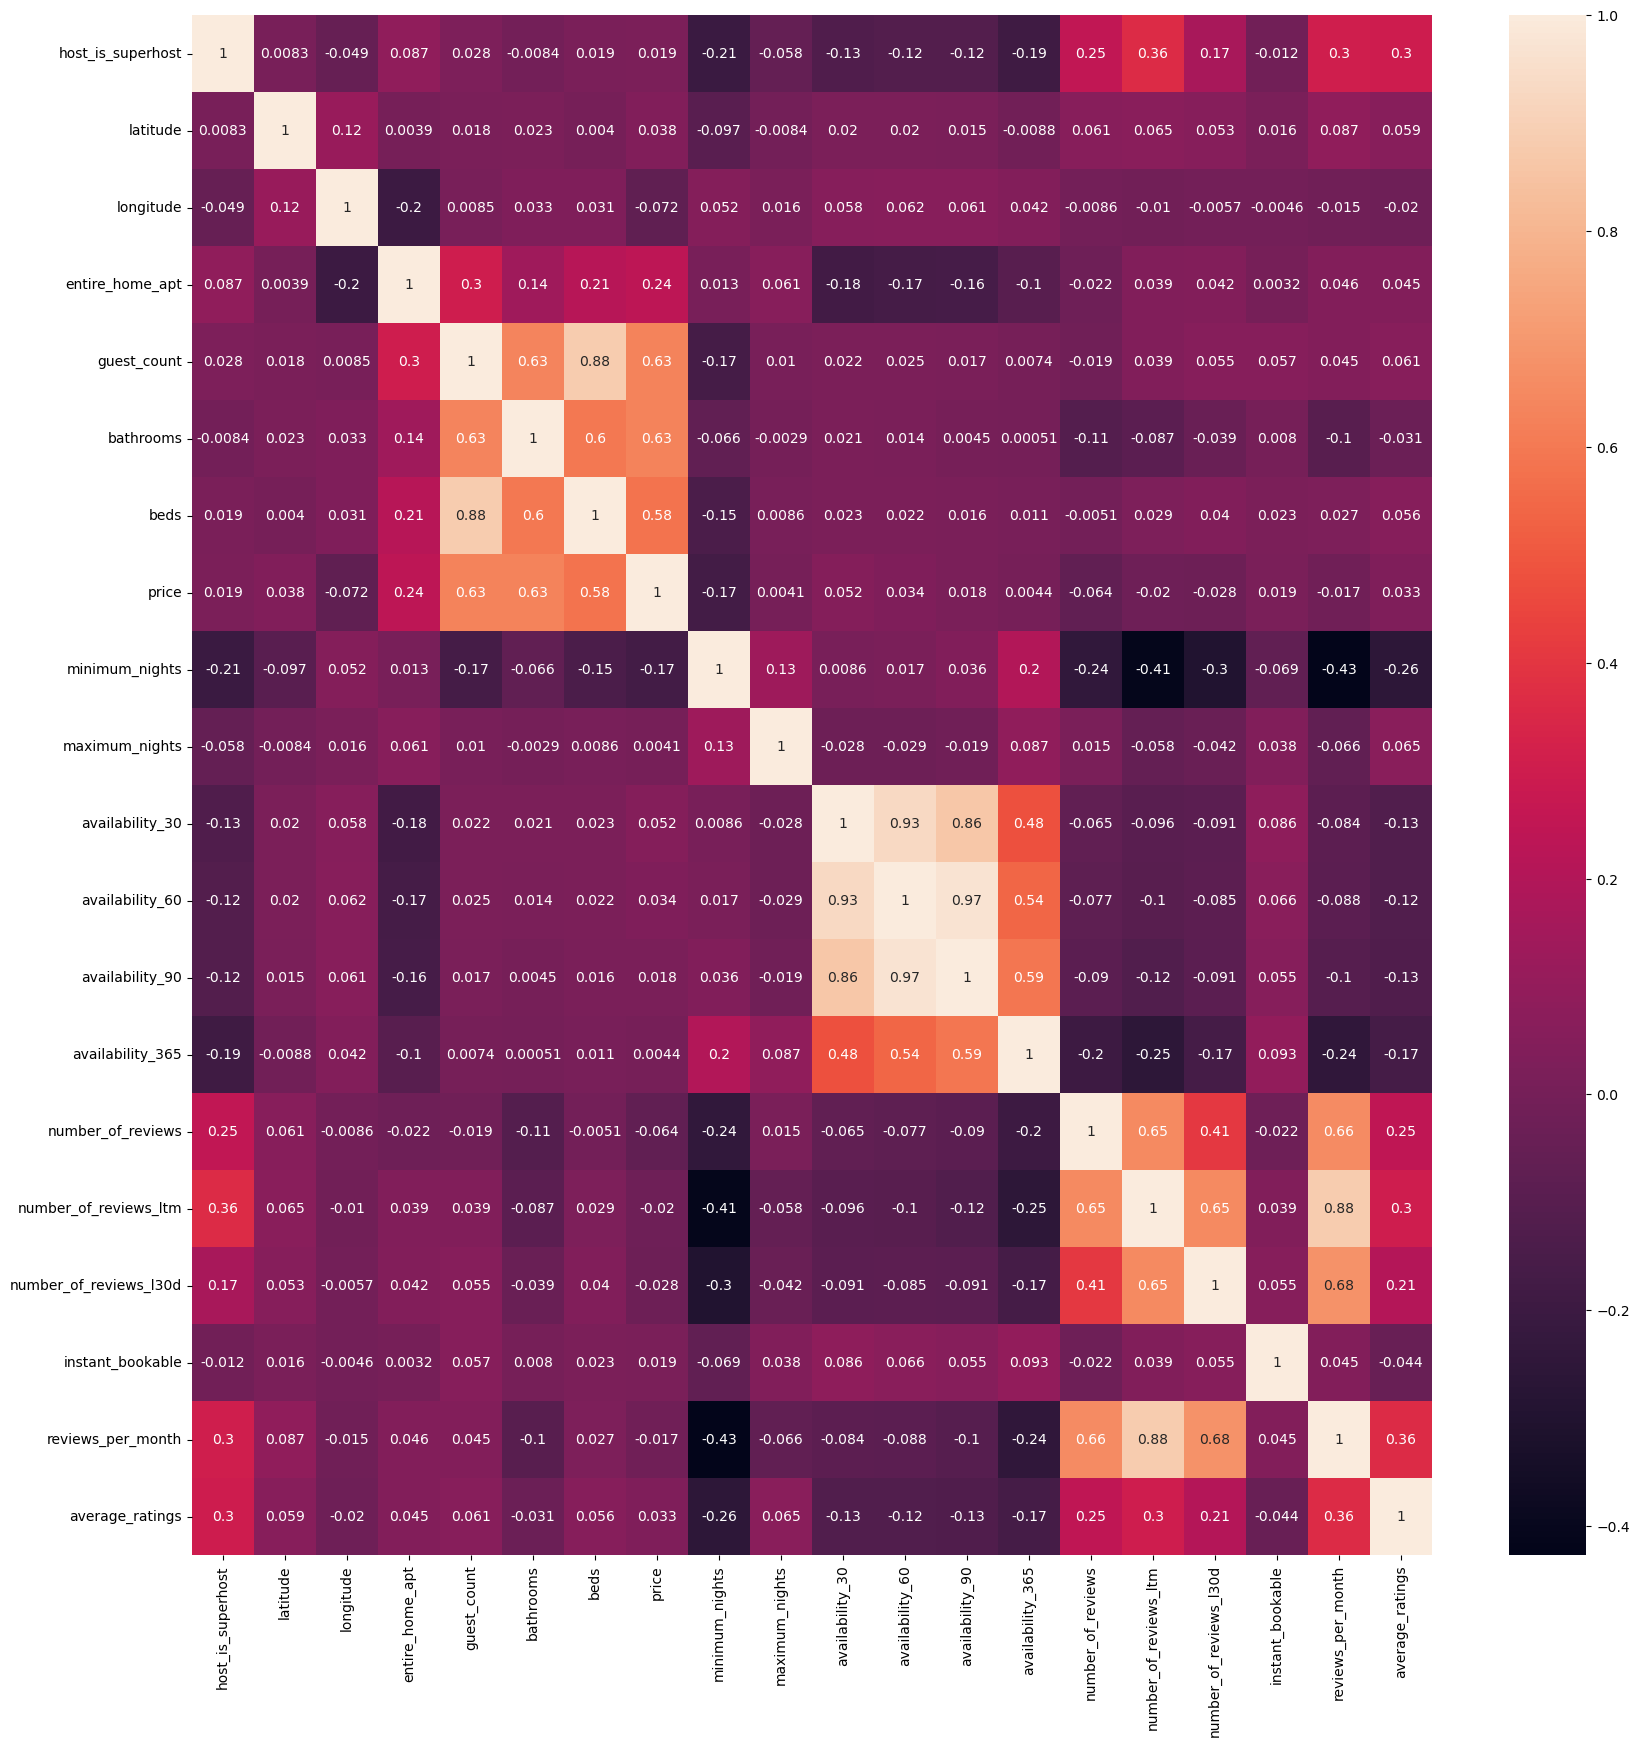

In [27]:
#create a subplot with matplotlib 
f,ax = plt.subplots(figsize = (20,20))

#creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots
corr = sns.heatmap(df_bnb_selected.corr(), annot = True, ax = ax)
# The 'annot' argument allows the plot to place the correlation coeffiecents on the heat map

# Hypthesis: As price increases so does the amount of beds in an airbnb. 

<Axes: xlabel='price', ylabel='Count'>

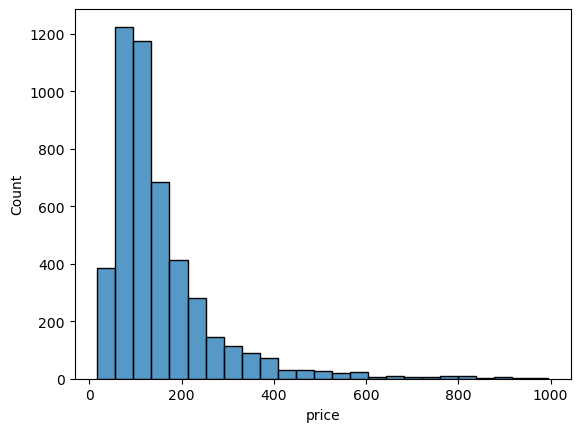

In [37]:
#extreme value check
sns.histplot(df_airbnb['price'], bins = 25)

In [38]:
#checking the mean of price 
df_airbnb['price'].mean()

154.83298451234828

In [39]:
#checking median of price 
df_airbnb['price'].median()

120.0

In [40]:
#checking maximum price 
df_airbnb['price'].max()

995.0

In [34]:
# there may be outliers but given that airbnbs vary in price it is likely that there are just fewer expenive 'luxury'

# Prepping data for regression

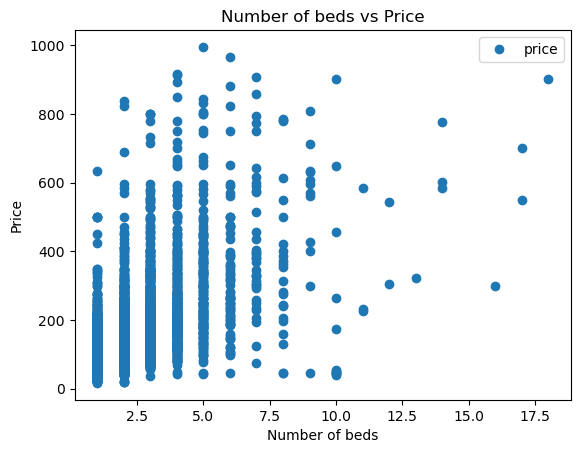

In [41]:
#creating a scatterplot using matplotlib to visualize how the variables plot against each other

df_airbnb.plot(x = 'beds', y= 'price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of beds vs Price')  
plt.xlabel('Number of beds')  
plt.ylabel('Price')  
plt.show()

In [36]:
# it does not look like this is going to have a linear relationship 

In [42]:
# reshape the variables into NumPy arrays and put them into sepearte objects 
X = df_airbnb['beds'].values.reshape(-1,1)
y = df_airbnb['price'].values.reshape(-1,1)

In [43]:
X

array([[1.],
       [3.],
       [4.],
       ...,
       [2.],
       [1.],
       [4.]])

In [44]:
y

array([[ 35.],
       [149.],
       [190.],
       ...,
       [300.],
       [135.],
       [200.]])

In [46]:
#splitting data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [47]:
#creating a regression object that will be fit onto the training model 
regression = LinearRegression()

In [48]:
#fitting the regression object onto the training set 
regression.fit(X_train, y_train)

LinearRegression()

In [51]:
#predict the values of y using x 
y_predicted = regression.predict(X_test)

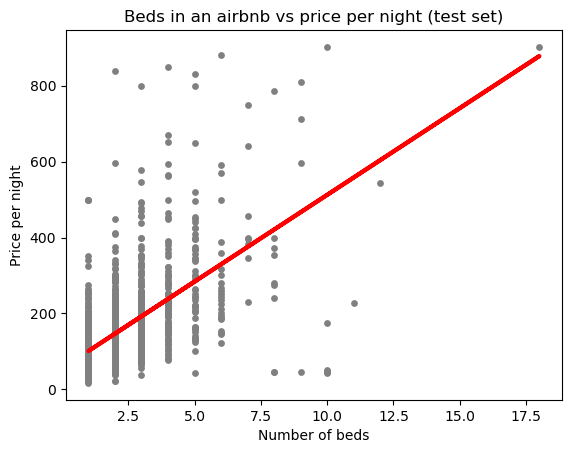

In [53]:
#creating a plot that shows the regression line from the model on the test set 
plot_test = plt 
plot_test.scatter(X_test, y_test, color ='gray', s = 15) 
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Beds in an airbnb vs price per night (test set)') 
plot_test.xlabel('Number of beds')
plot_test.ylabel('Price per night')
plot_test.show()

# As predicted when I looked at how the variables are related the relationship does not look linear. I don't think the line fits the distribution of this data works for a linear regression. I think the relationship between bedrooms and price will have to be evaluated with a different model

In [54]:
# create objects that contain the model summary statistics 
rmse = mean_squared_error(y_test, y_predicted) #mean squared error
r2 = r2_score(y_test, y_predicted) #R2 score 

In [55]:
#printing summary statistics to evaluate model perfomance 
print('Slope:' ,regression.coef_)
print('Mean Squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[45.69758509]]
Mean Squared error:  9152.325457433391
R2 score:  0.305810017769226


# looking at the mean Squared error and R2 score there is no way that this predictive model fits the data. This is not a successful mode. I will try looking at it without the outliers but I do not think this will make a difference. 

In [56]:
y_predicted

array([[283.83975547],
       [146.74700021],
       [101.04941512],
       ...,
       [283.83975547],
       [101.04941512],
       [146.74700021]])

In [73]:
#creating a dataframe to compare predicted and actual values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,298.0,283.839755
1,59.0,146.747000
2,500.0,101.049415
3,165.0,146.747000
4,95.0,101.049415
5,74.0,146.747000
6,316.0,146.747000
7,40.0,146.747000
8,141.0,146.747000
9,129.0,192.444585


# looking at the actual values versus the predicted values there is a large difference and this does data does not seem to fit into a linear model

# comparing the regression set and the training set 

In [58]:
#predicting X_train
y_predicted_train = regression.predict(X_train) 

In [60]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[45.69758509]]
Mean squared erorr:  9375.261498772468
R2 score:  0.35012296159858725


# The mean squared error and R2 are almost identical for the training set indicating that this is data is likely not linear. 

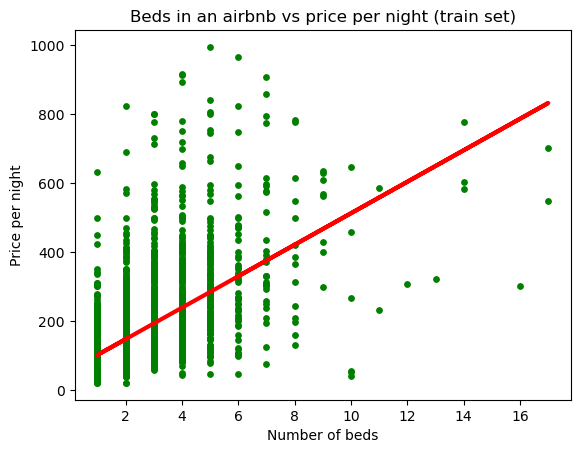

In [62]:
#visualizing the training set results
plot_test = plt 
plot_test.scatter(X_train, y_train, color = 'green', s= 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth = 3)
plot_test.title('Beds in an airbnb vs price per night (train set)') 
plot_test.xlabel('Number of beds')
plot_test.ylabel('Price per night')
plot_test.show()

# Removing outliers 

In [63]:
#cleaning the extreme values from 'price' variable 
df_outliers = df_airbnb[df_airbnb['price'] <=600]

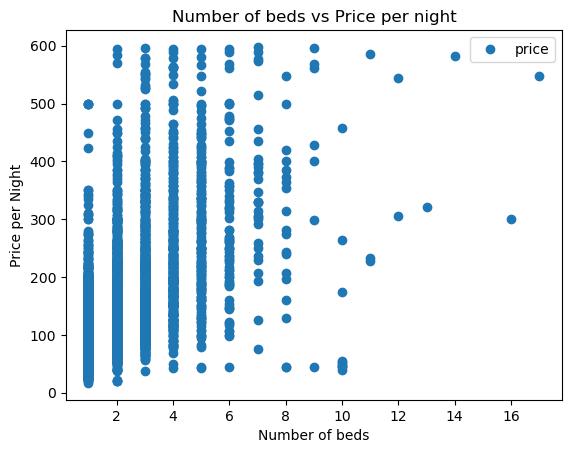

In [64]:
# looking at the scatterplot without outliers 
df_outliers.plot(x = 'beds', y = 'price', style = 'o')
plt.title('Number of beds vs Price per night')
plt.xlabel('Number of beds')
plt.ylabel('Price per Night')
plt.show()

In [65]:
#reshaping again 
X_2 = df_outliers['beds'].values.reshape(-1,1)
y_2 = df_outliers['price'].values.reshape(-1,1)

In [66]:
#splitting to train and test sets again 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [67]:
#run the regression and fit it again 
regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [68]:
#predicting again 
y_predicted_2 = regression.predict(X_test_2)

In [70]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [71]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[35.8874946]]
Mean squared error:  6810.628564224423
R2 score:  0.31403311087907715


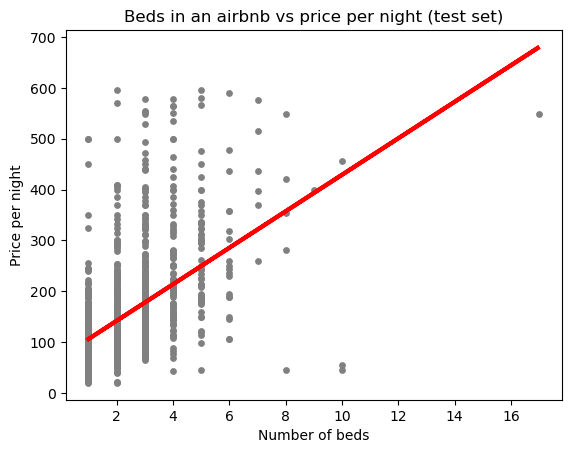

In [72]:
#visualizing the test set results
plot_test = plt 
plot_test.scatter(X_test_2, y_test_2, color ='gray', s = 15) 
plot_test.plot(X_test_2, y_predicted_2, color = 'red', linewidth = 3)
plot_test.title('Beds in an airbnb vs price per night (test set)') 
plot_test.xlabel('Number of beds')
plot_test.ylabel('Price per night')
plot_test.show()

In [74]:
#creating a dataframe to compare predicted and actual values of y
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,75.0,106.236318
1,112.0,106.236318
2,145.0,142.123812
3,60.0,106.236318
4,109.0,142.123812
5,79.0,106.236318
6,175.0,178.011307
7,440.0,178.011307
8,114.0,142.123812
9,245.0,106.236318


# My final thoughts were that after looking at the data with no outliers I am able to confirm that this relationship is not linear. I can rule that out and should look for relationships between other variables for linear relationships. I think that removing the outliers potentially opened up room for bias but seeing that it made no differnece gave me insight to look at this relationship with a different type of model. 